In [1]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

In [2]:
if_layer = neuron.IFNode()

In [3]:
print( if_layer.v )

0.0


In [12]:
x = torch.rand(size=[2, 3])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
#if_layer.reset()


x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])


In [13]:
x

tensor([[0.6465, 0.3249, 0.4859],
        [0.6502, 0.5927, 0.2722]])

In [14]:
torch.rand(size=[2, 3])

tensor([[0.3651, 0.5801, 0.5420],
        [0.9689, 0.2439, 0.5824]])

In [15]:
if_layer(x)


tensor([[0., 0., 1.],
        [1., 1., 0.]])

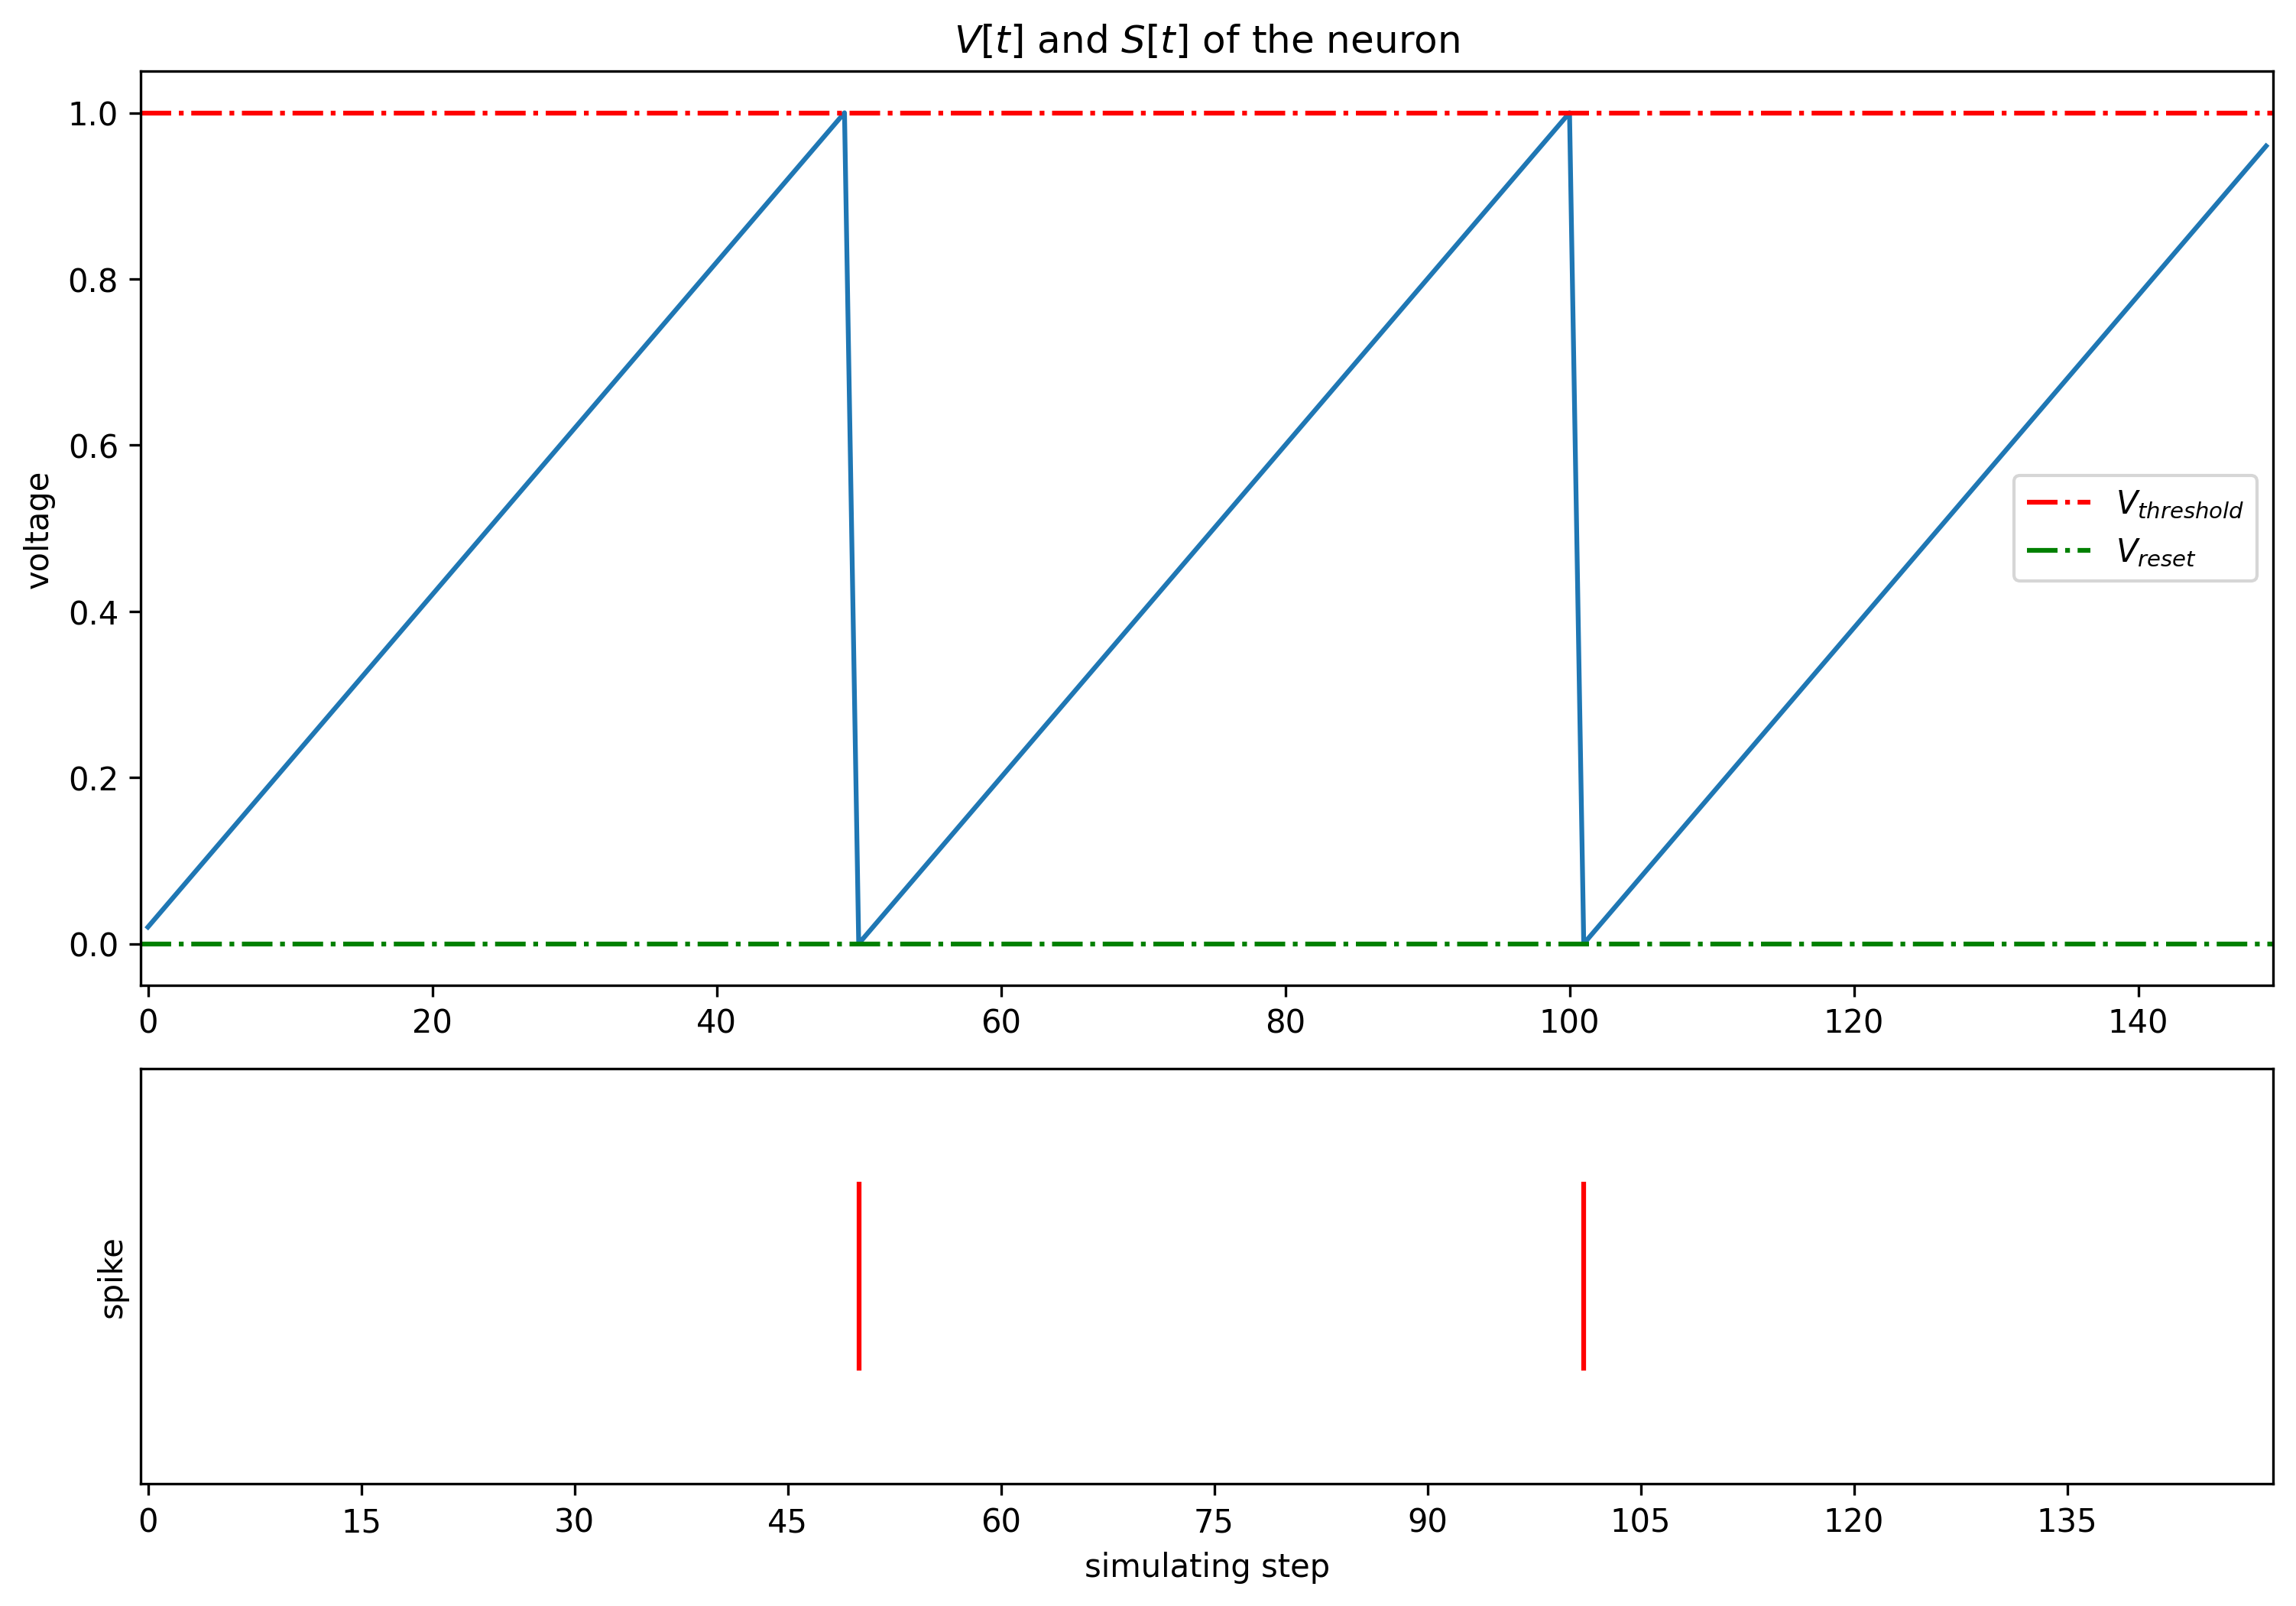

In [16]:
if_layer.reset()
x = torch.as_tensor([0.02])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

In [17]:
x

tensor([0.0200])

In [18]:
if_layer

IFNode(
  v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
  (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
)

In [19]:
if_layer(x)

tensor([0.])

In [20]:
if_layer.v

tensor([0.9800])

In [24]:
len( s_list )

150

In [25]:
len( v_list )

150

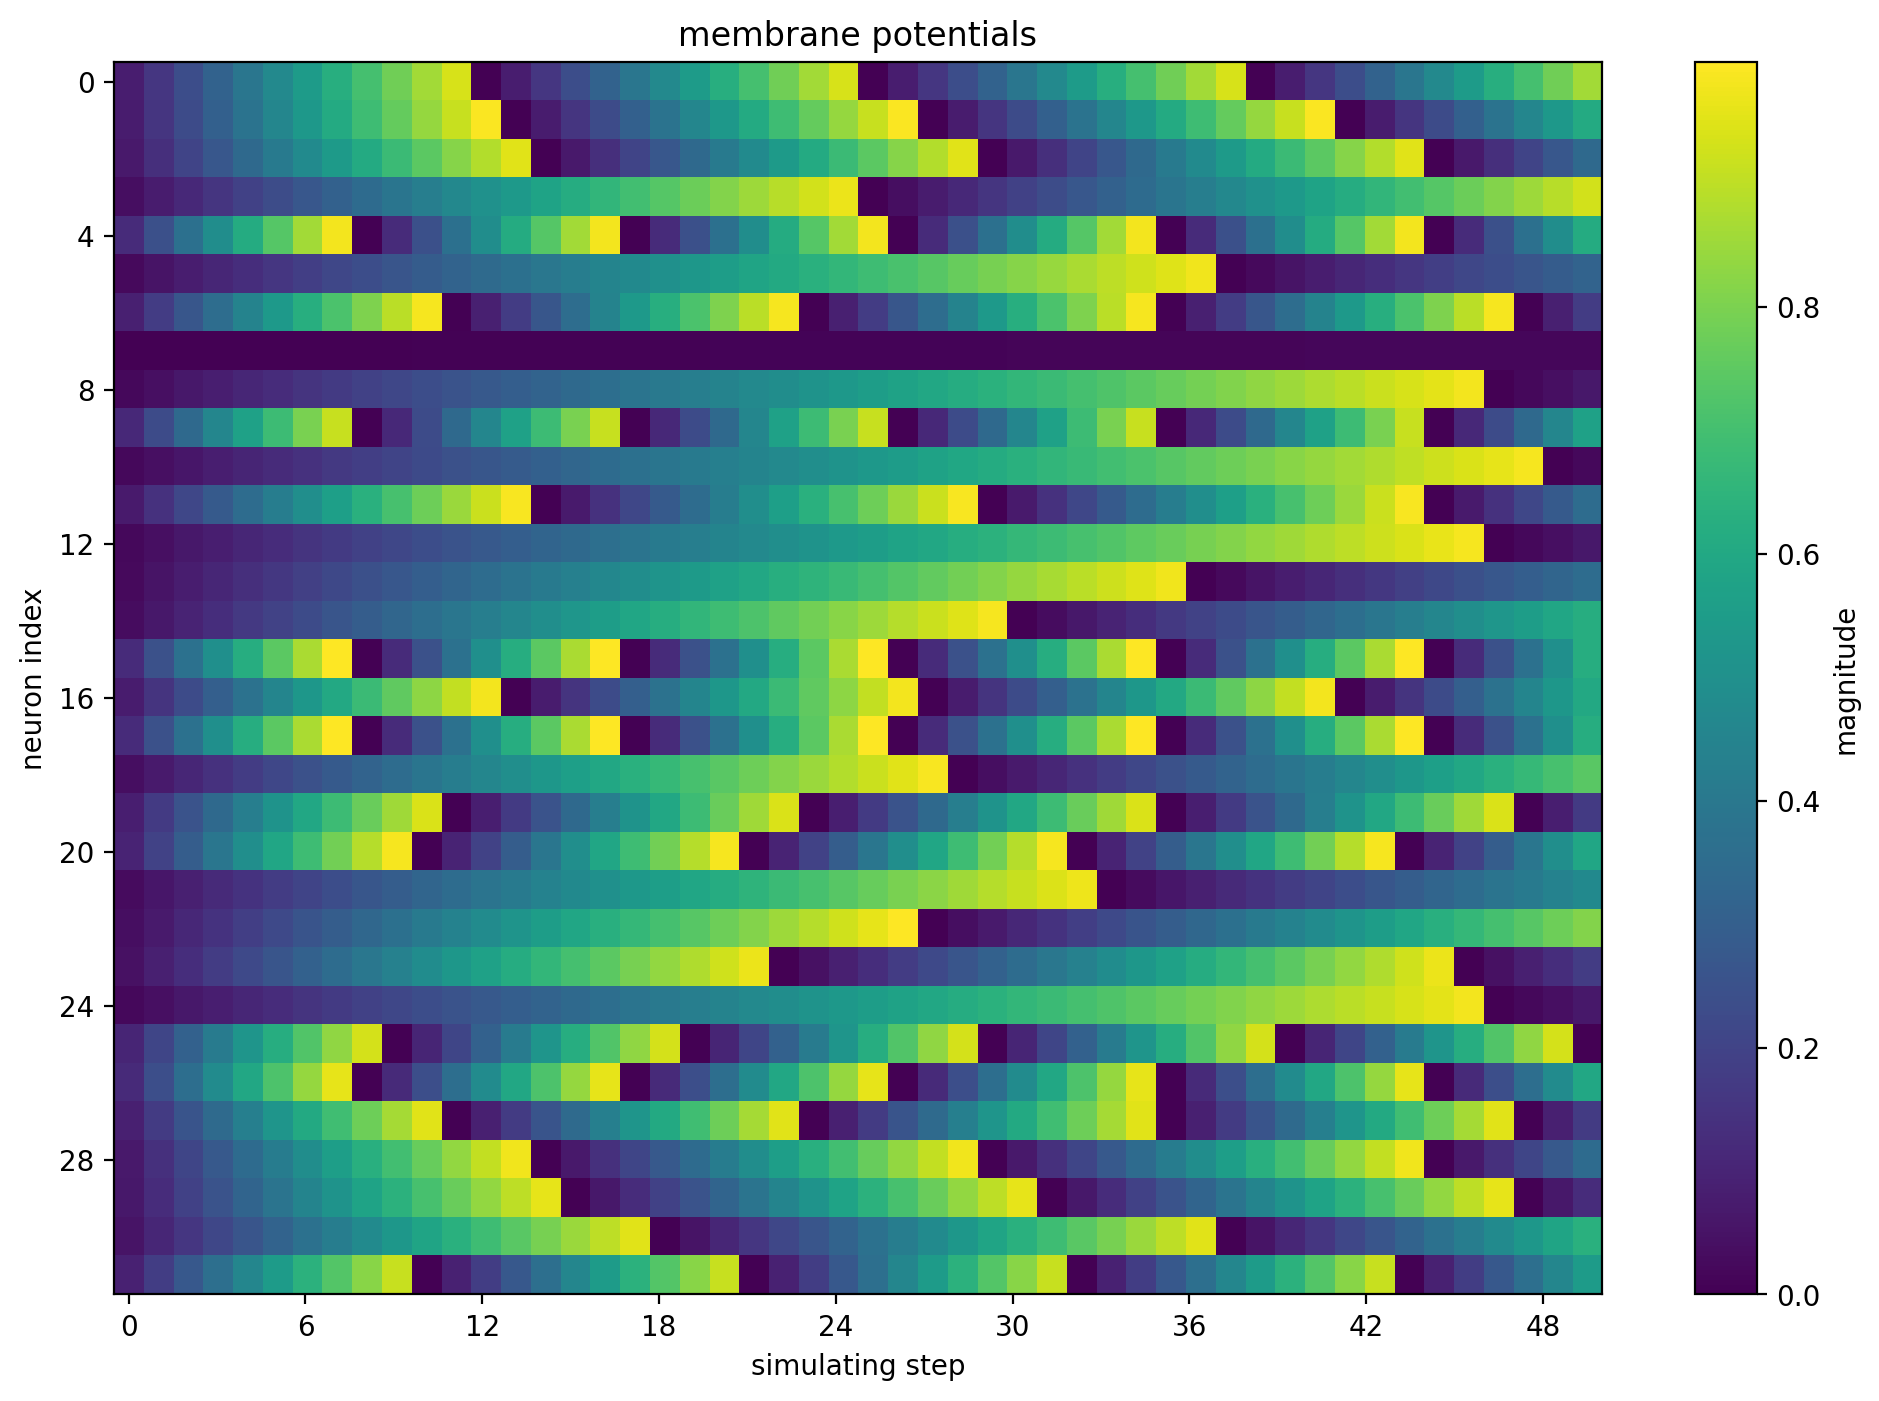

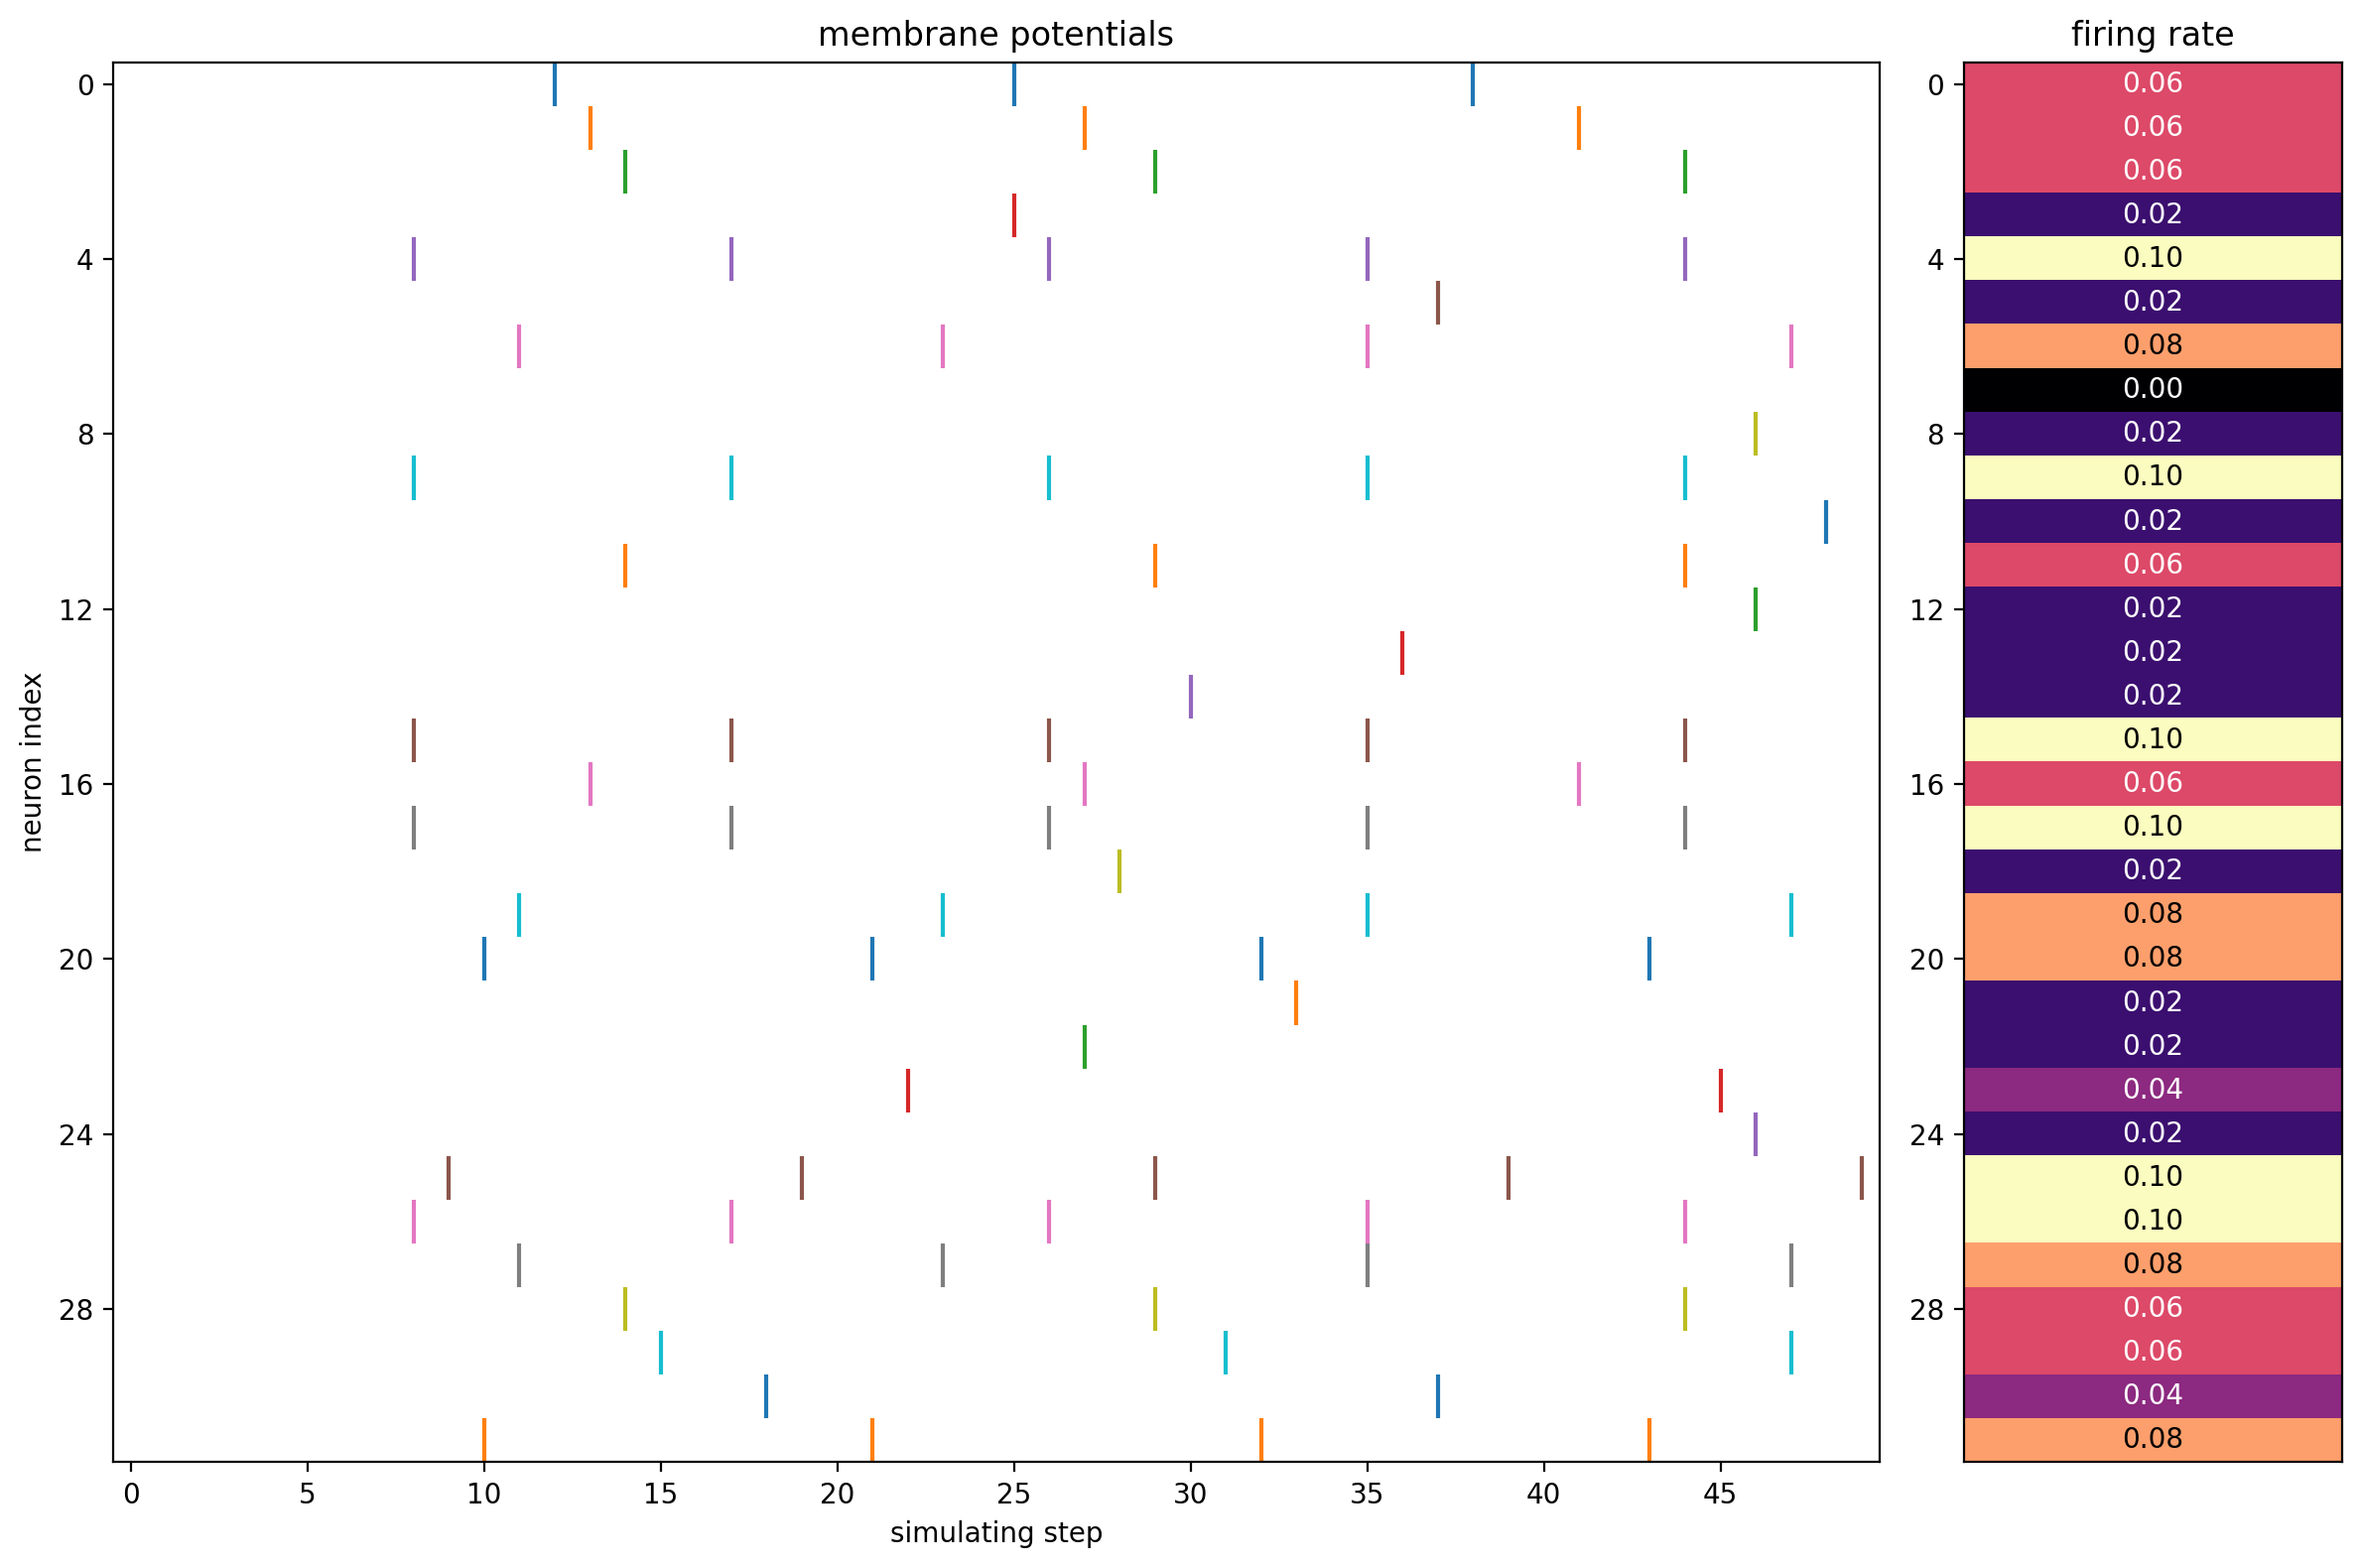

In [27]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []

for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane potentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [29]:
if_layer

IFNode(
  v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
  (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
)

In [30]:
import inspect

In [32]:
inspect.getmembers( if_layer.v )

RuntimeError: tensor.H is only supported on matrices (2-D tensors). Got 1-D tensor.

In [33]:
if_layer.v

tensor([0.8585, 0.6101, 0.3398, 0.9287, 0.6132, 0.3169, 0.1788, 0.0192, 0.0639,
        0.5707, 0.0205, 0.3530, 0.0642, 0.3526, 0.6228, 0.6230, 0.6037, 0.6231,
        0.7410, 0.1713, 0.5903, 0.4722, 0.8132, 0.1760, 0.0639, 0.0000, 0.6001,
        0.1730, 0.3488, 0.1284, 0.6350, 0.5483])

In [34]:
type( if_layer.v )

torch.Tensor

In [35]:
len( if_layer.v )

32

In [36]:
if_layer.v

tensor([0.8585, 0.6101, 0.3398, 0.9287, 0.6132, 0.3169, 0.1788, 0.0192, 0.0639,
        0.5707, 0.0205, 0.3530, 0.0642, 0.3526, 0.6228, 0.6230, 0.6037, 0.6231,
        0.7410, 0.1713, 0.5903, 0.4722, 0.8132, 0.1760, 0.0639, 0.0000, 0.6001,
        0.1730, 0.3488, 0.1284, 0.6350, 0.5483])

In [37]:
x

tensor([0.0780, 0.0763, 0.0680, 0.0387, 0.1226, 0.0264, 0.0894, 0.0004, 0.0213,
        0.1141, 0.0205, 0.0706, 0.0214, 0.0271, 0.0328, 0.1246, 0.0755, 0.1246,
        0.0353, 0.0857, 0.0984, 0.0295, 0.0370, 0.0440, 0.0213, 0.1039, 0.1200,
        0.0865, 0.0698, 0.0642, 0.0529, 0.0914])

In [38]:
len( x )

32

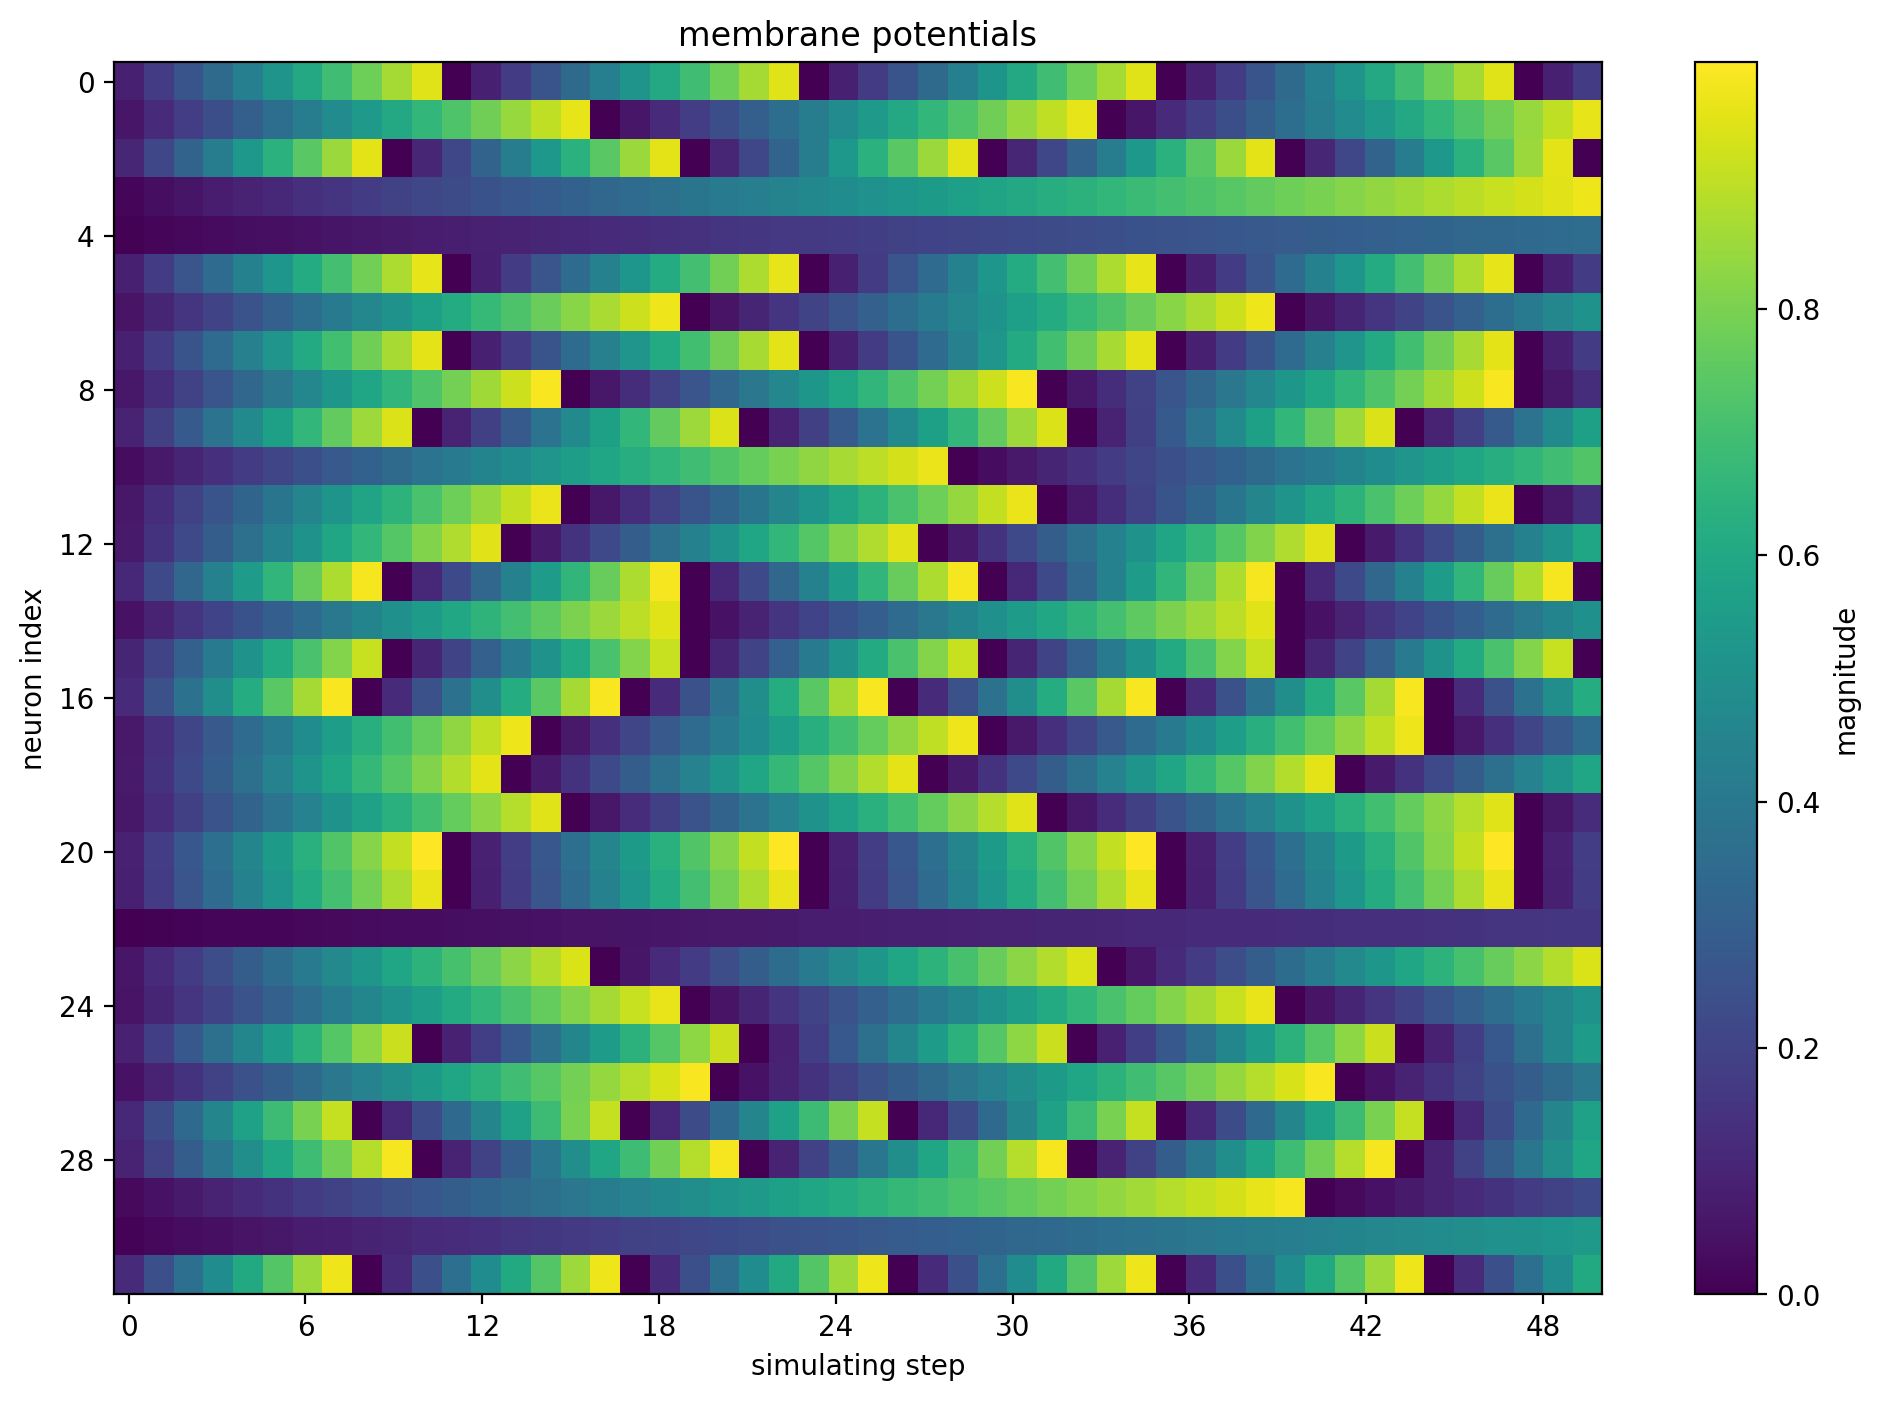

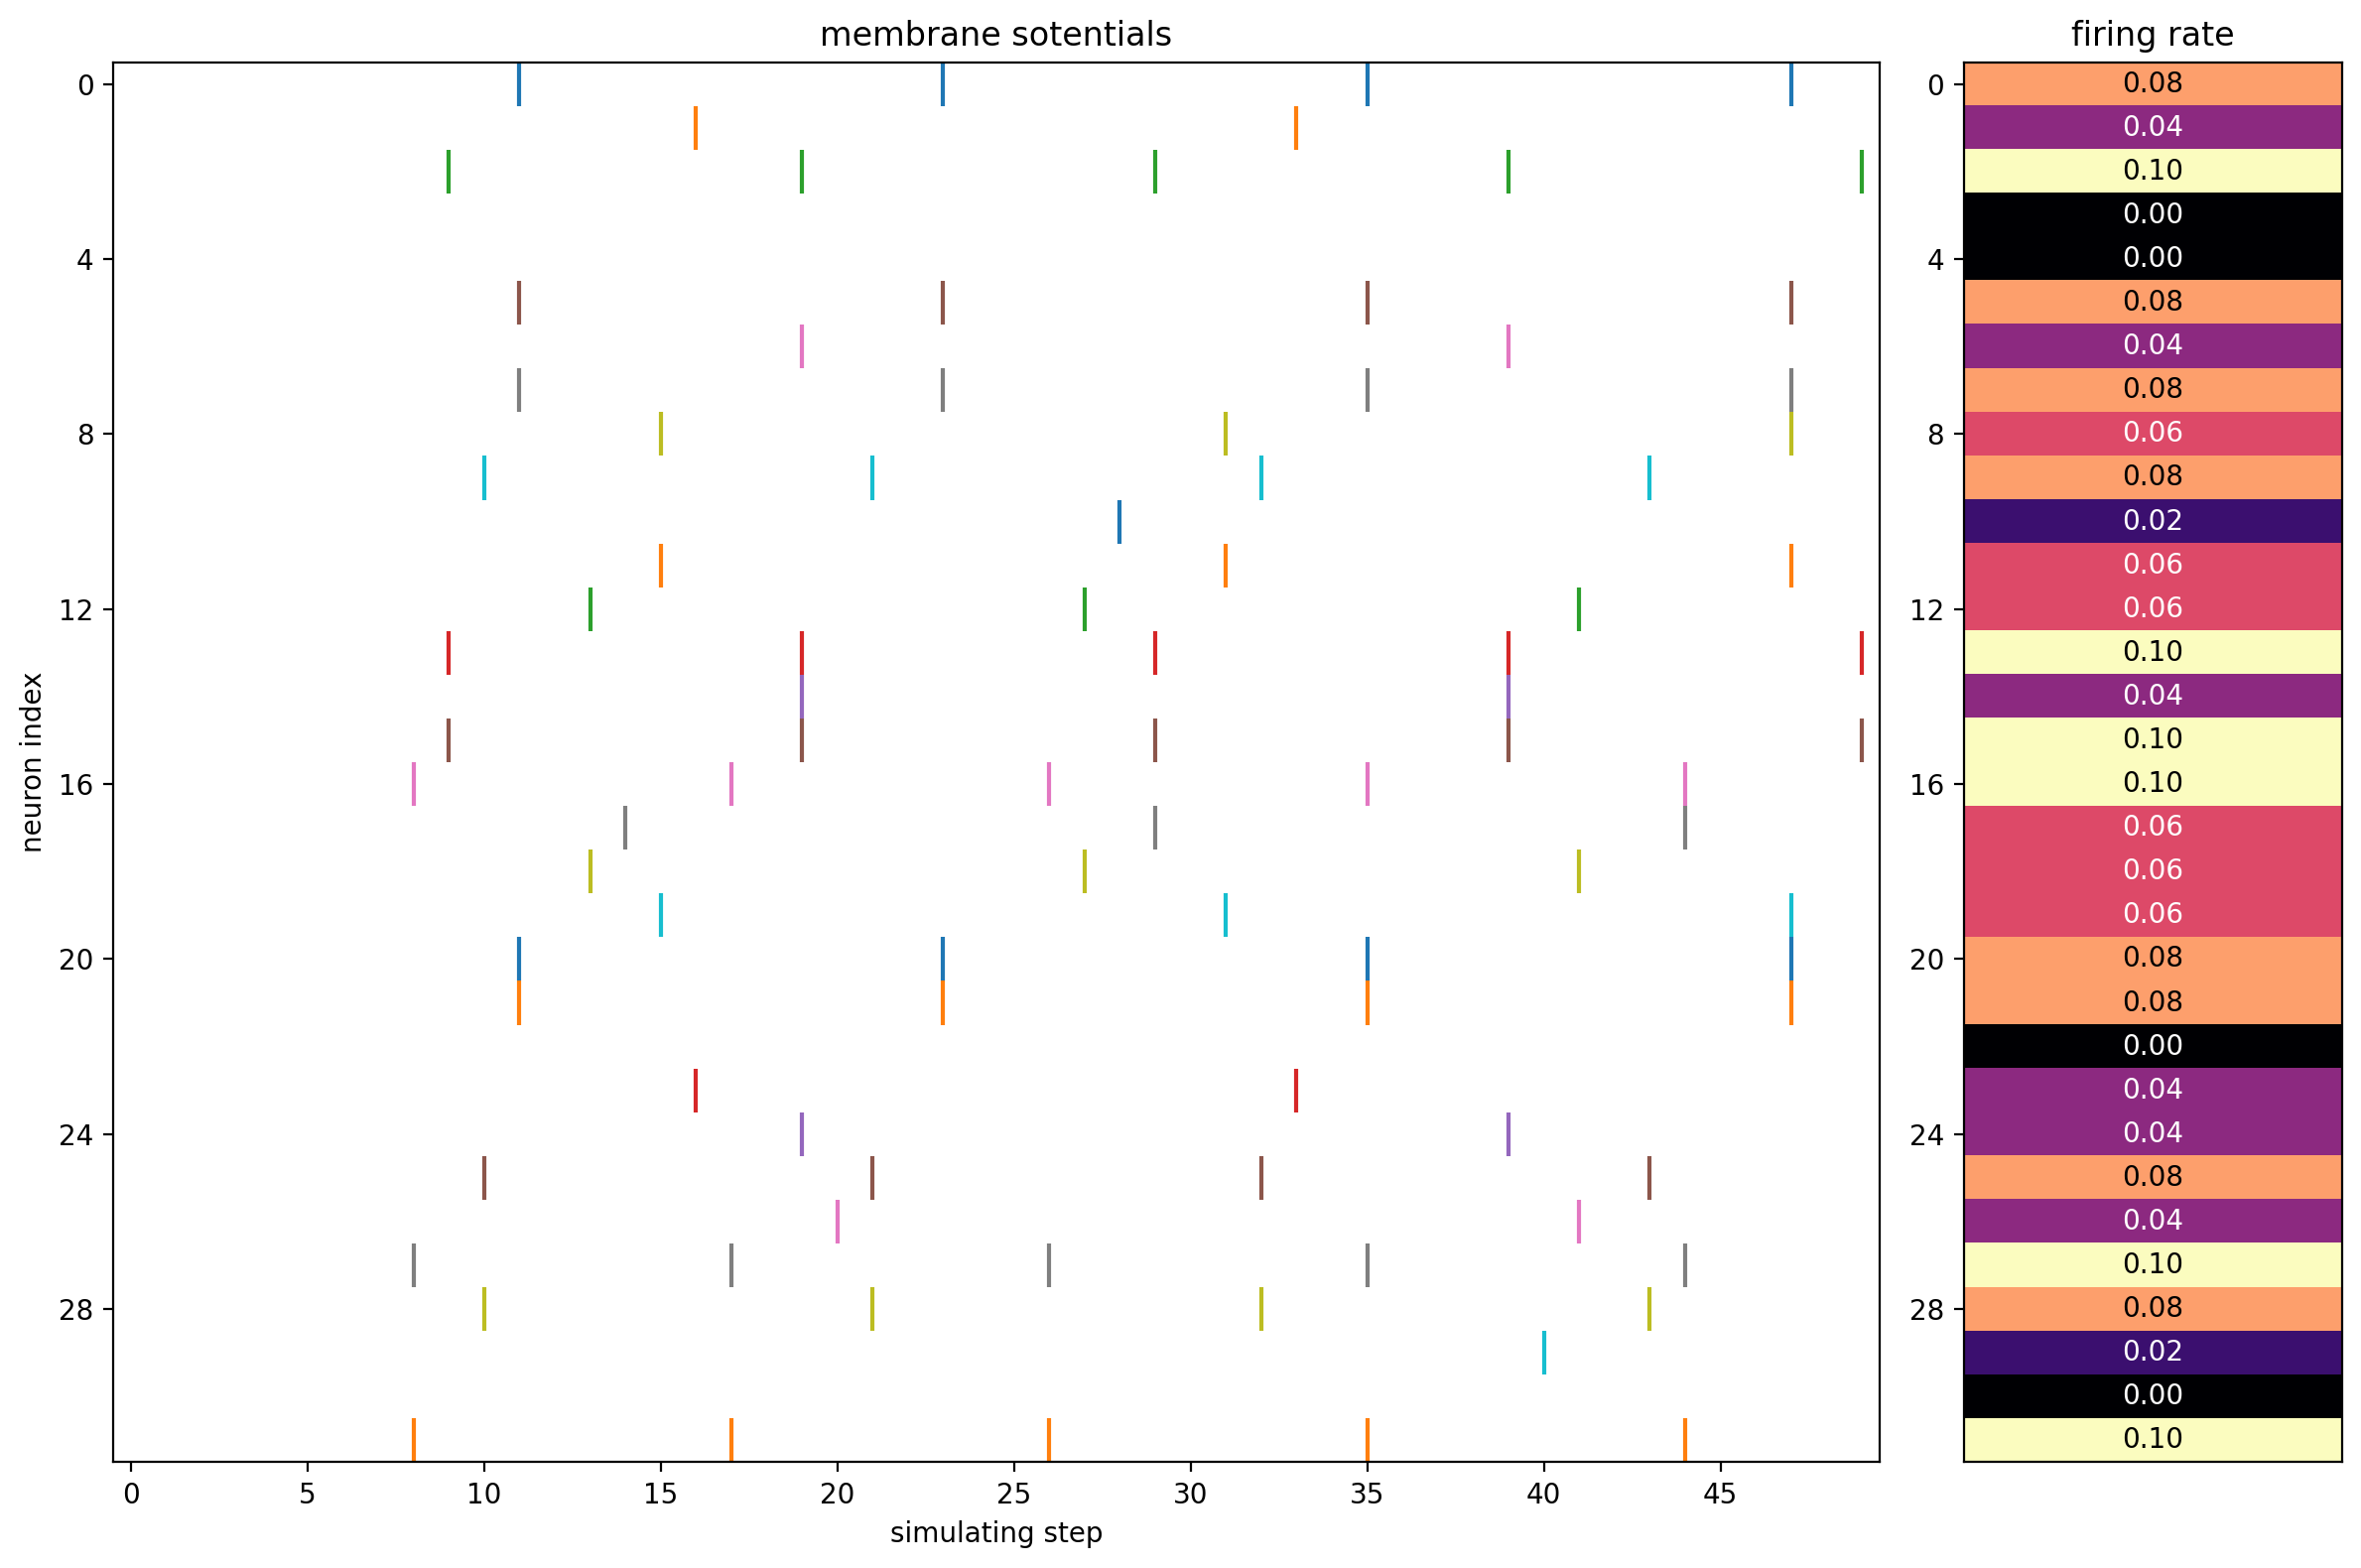

In [39]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [45]:
import torch.nn

torch.nn.Sequential(
    layer.Flatten(),
    layer.Linear(28 * 28, 10, bias=False),
    neuron.LIFNode(tau=tau, surrogate_function=surrogate.ATan())
    )


NameError: name 'layer' is not defined

In [43]:
import torch.nn

In [44]:
nn.Sequential(
    layer.Flatten(),
    layer.Linear(28 * 28, 10, bias=False),
    neuron.LIFNode(tau=tau, surrogate_function=surrogate.ATan())
    )


NameError: name 'nn' is not defined